# Homework Assignment Python APIs. 
# WeatherPy


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import json
import pytemperature

# Import API key
import api_keys
api_key = "84a12051ef8d9ab784bd6f8864a8d6c2"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
Columnnames = ["City", "Country", "Temperature (F)", "Latitude", "Longitude", "Humidity (%)", "Cloudiness (%)", "Wind Speed (mph)"]

Selected_Cities_df = pd.DataFrame(columns=Columnnames)

Selected_Cities_df.head

print("Beginning Data Retrieval \n---------------------------------")
for i in range(len(cities)): 
    print("Processing Record " + str(i) + " | " + cities[i])
    url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&q="
    combi_url = url + str(cities[i])+str("&appid=" + api_key)
    response = requests.get(combi_url)
    if response.status_code == 404:
        print("City not found, Skipping...")
    else:
        data = response.json()
        Selected_Cities_df = Selected_Cities_df.append({'City':data["name"],
                                                    'Country':data["sys"]['country'], 
                                                    'Temperature (F)':data["main"]["temp"],
                                                    'Latitude':data["coord"]["lat"],
                                                    'Longitude':data["coord"]["lon"],
                                                    'Humidity (%)':data["main"]["humidity"],
                                                    'Cloudiness (%)':data["clouds"]["all"],
                                                    'Wind Speed (mph)':data["wind"]["speed"]},
                                                    ignore_index=True)
    
print("------------------------------------\nData Retrieval Complete")   

Beginning Data Retrieval 
---------------------------------
Processing Record 0 | rikitea
Processing Record 1 | barentsburg
City not found, Skipping...
Processing Record 2 | vaini
Processing Record 3 | mataura
Processing Record 4 | bambous virieux
Processing Record 5 | saskylakh
Processing Record 6 | port hedland
Processing Record 7 | batemans bay
Processing Record 8 | lavrentiya
Processing Record 9 | fenoarivo atsinanana
Processing Record 10 | meyungs
City not found, Skipping...
Processing Record 11 | tasiilaq
Processing Record 12 | ploemeur
Processing Record 13 | flinders
Processing Record 14 | bengkulu
City not found, Skipping...
Processing Record 15 | taolanaro
City not found, Skipping...
Processing Record 16 | jumla
Processing Record 17 | kilindoni
Processing Record 18 | goderich
Processing Record 19 | portland
Processing Record 20 | lebu
Processing Record 21 | new norfolk
Processing Record 22 | ambon
Processing Record 23 | yellowknife
Processing Record 24 | skalistyy
City not fou

Processing Record 228 | waddan
Processing Record 229 | palabuhanratu
City not found, Skipping...
Processing Record 230 | mahibadhoo
Processing Record 231 | sur
Processing Record 232 | puerto ayacucho
Processing Record 233 | corinto
Processing Record 234 | lagoa
Processing Record 235 | kundgol
Processing Record 236 | louisbourg
City not found, Skipping...
Processing Record 237 | bonavista
Processing Record 238 | bilibino
Processing Record 239 | marsh harbour
Processing Record 240 | ust-barguzin
Processing Record 241 | kholmogory
Processing Record 242 | imisli
City not found, Skipping...
Processing Record 243 | platanos
Processing Record 244 | karratha
Processing Record 245 | puerto escondido
Processing Record 246 | taldan
Processing Record 247 | yulara
Processing Record 248 | havoysund
Processing Record 249 | wazzan
City not found, Skipping...
Processing Record 250 | viedma
Processing Record 251 | mahajanga
Processing Record 252 | kapuskasing
Processing Record 253 | jiuquan
Processing R

Processing Record 464 | shimoda
Processing Record 465 | pathein
Processing Record 466 | burnie
Processing Record 467 | pangnirtung
Processing Record 468 | mendahara
City not found, Skipping...
Processing Record 469 | tautira
Processing Record 470 | mount isa
Processing Record 471 | makarov
Processing Record 472 | lakselv
Processing Record 473 | linchuan
City not found, Skipping...
Processing Record 474 | lazaro cardenas
Processing Record 475 | georgetown
Processing Record 476 | sitka
Processing Record 477 | morondava
Processing Record 478 | asfi
City not found, Skipping...
Processing Record 479 | opuwo
Processing Record 480 | imeni morozova
Processing Record 481 | mariakani
Processing Record 482 | faya
Processing Record 483 | bouafle
Processing Record 484 | gambela
Processing Record 485 | nemuro
Processing Record 486 | la rochelle
Processing Record 487 | zhmerynka
Processing Record 488 | kampene
Processing Record 489 | jackson
Processing Record 490 | maneadero
City not found, Skipping.

In [6]:
Selected_Cities_df.count()

City                557
Country             557
Temperature (F)     557
Latitude            557
Longitude           557
Humidity (%)        557
Cloudiness (%)      557
Wind Speed (mph)    557
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
Selected_Cities_df.to_csv(output_data_file)

In [8]:
Selected_Cities_df

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Rikitea,PF,80.25,-23.12,-134.97,98,80,14.16
1,Vaini,IN,80.44,15.34,74.49,26,0,9.17
2,Mataura,NZ,60.68,-46.19,168.86,65,8,4.36
3,Bambous Virieux,MU,86.00,-20.34,57.76,70,40,16.11
4,Saskylakh,RU,-37.92,71.97,114.09,0,0,7.45
5,Port Hedland,AU,98.60,-20.31,118.58,37,36,5.82
6,Batemans Bay,AU,73.10,-35.71,150.18,91,76,5.59
7,Lavrentiya,RU,1.41,65.58,-170.99,91,0,13.04
8,Fenoarivo Atsinanana,MG,84.20,-17.38,49.41,74,40,4.70
9,Tasiilaq,GL,14.00,65.61,-37.64,78,88,2.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

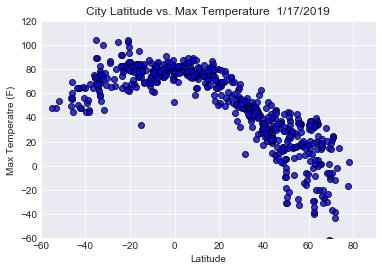

In [17]:
plt.scatter(Selected_Cities_df["Latitude"],
           Selected_Cities_df["Temperature (F)"],
           edgecolor="black", linewidths=1, marker="o",
           facecolors="blue", alpha=0.8, label="City")

plt.style.use("seaborn-darkgrid")
plt.title(f"City Latitude vs. Max Temperature  1/17/2019")
plt.ylabel("Max Temperatre (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60,90])
plt.ylim([-60,120])

plt.savefig("output_data/Latitude_Temperature.png")

plt.show()

#### Latitude vs. Humidity Plot

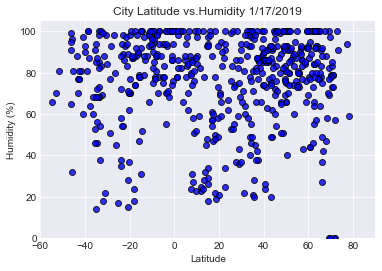

In [15]:
plt.scatter(Selected_Cities_df["Latitude"],
           Selected_Cities_df["Humidity (%)"],
           edgecolor="black", linewidths=1, marker="o",
           facecolors="blue", alpha=0.8, label="City")

plt.style.use('seaborn-darkgrid')
plt.title(f"City Latitude vs.Humidity 1/17/2019")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60,90])
plt.ylim([0,105])

plt.savefig("output_data/Latitude_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

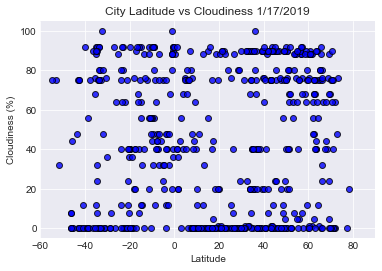

In [19]:
plt.scatter(Selected_Cities_df["Latitude"],
           Selected_Cities_df["Cloudiness (%)"],
           edgecolor="black", linewidths=1, marker="o",
           facecolors="blue", alpha=0.8, label="City")

plt.style.use('seaborn-darkgrid')
plt.title(f"City Laditude vs Cloudiness 1/17/2019")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60,90])
plt.ylim([-5,105])

plt.savefig("output_data/Latitude_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

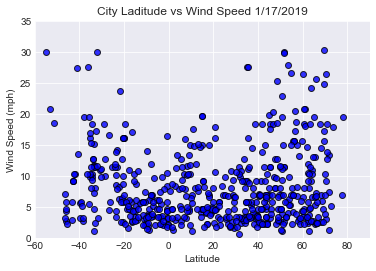

In [23]:
plt.scatter(Selected_Cities_df["Latitude"],
           Selected_Cities_df["Wind Speed (mph)"],
           edgecolor="black", linewidths=1, marker="o",
           facecolors="blue", alpha=0.8, label="City")

plt.style.use('seaborn-darkgrid')
plt.title(f"City Laditude vs Wind Speed 1/17/2019")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60,90])
plt.ylim([0,35])

plt.savefig("output_data/Latitude_WindSpeed.png")

plt.show()

In [28]:
# DESCRIPTION OF OBSERVABLE TRENDS

   # * The temperature increases as you approch the equator. the Northern hemisphere is cooler than the Southern at this moment.  
   # * no strong relationship can be found between latitude and wind speed, but in many countries the wind speed is below 10 mph at this time
   # * no strong relationship can be found between latitude and cloudiness,but a large number of cities have a cloudless sky
   # * no very strong relationship can be found between latitude and humidiy, but you see that in the Northerm hemisphere there are a large numberof cities with a humidity around 80% or higher

